In [5]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

# New Section

In [6]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [7]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [8]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [10]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
year,1700.0,1.999571e+03,5.143070e+00,1.991000e+03,1.995000e+03,2.000000e+03,2.004000e+03,2.008000e+03
cereal_yield,1700.0,3.013318e+03,1.796206e+03,1.757000e+02,1.683365e+03,2.584800e+03,3.933400e+03,8.410800e+03
fdi_perc_gdp,1700.0,2.948940e+00,3.949722e+00,-1.502768e+01,8.341052e-01,1.993220e+00,3.702149e+00,5.137395e+01
en_per_gdp,1700.0,2.498227e+02,1.861950e+02,6.633537e+01,1.363205e+02,1.976249e+02,2.864749e+02,1.383380e+03
en_per_cap,1700.0,1.968980e+03,1.959420e+03,1.165115e+02,5.428828e+02,1.089226e+03,2.893996e+03,1.260784e+04
co2_ttl,1700.0,9.793999e+05,3.235692e+06,7.077310e+02,1.462125e+04,7.728386e+04,3.708446e+05,3.064936e+07
co2_per_cap,1700.0,4.676663e+00,4.906273e+00,2.941071e-02,9.227695e-01,3.093346e+00,7.441195e+00,3.710650e+01
co2_per_gdp,1700.0,4.823038e+02,3.921922e+02,4.555259e+01,2.571396e+02,3.684156e+02,5.869730e+02,3.343454e+03
pop_urb_aggl_perc,1700.0,2.148013e+01,1.210516e+01,3.526316e+00,1.238395e+01,1.852596e+01,2.898832e+01,6.050578e+01
prot_area_perc,1700.0,1.220179e+01,9.116682e+00,0.000000e+00,5.839844e+00,1.029379e+01,1.659930e+01,5.374983e+01


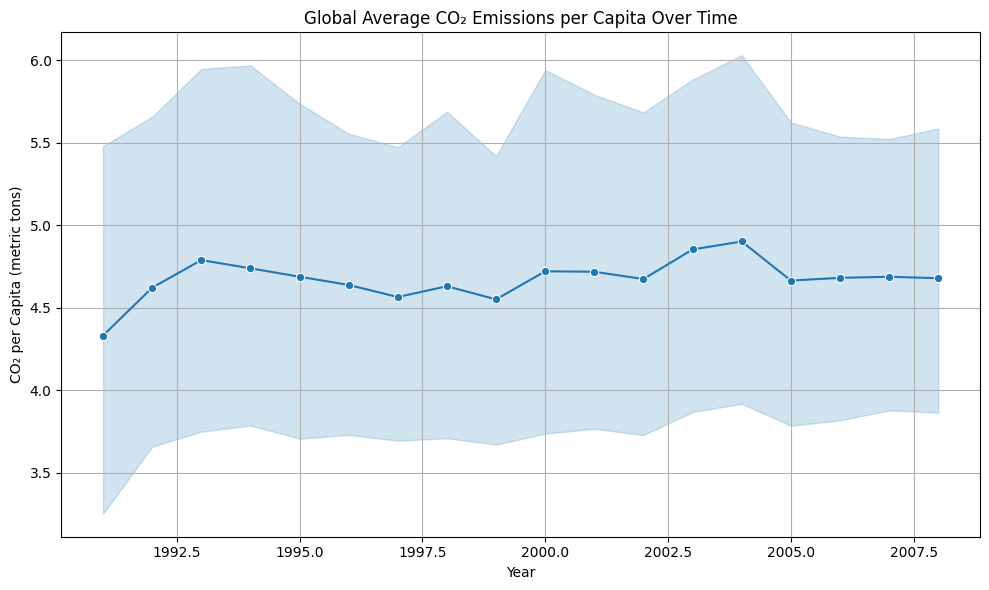

In [12]:
# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

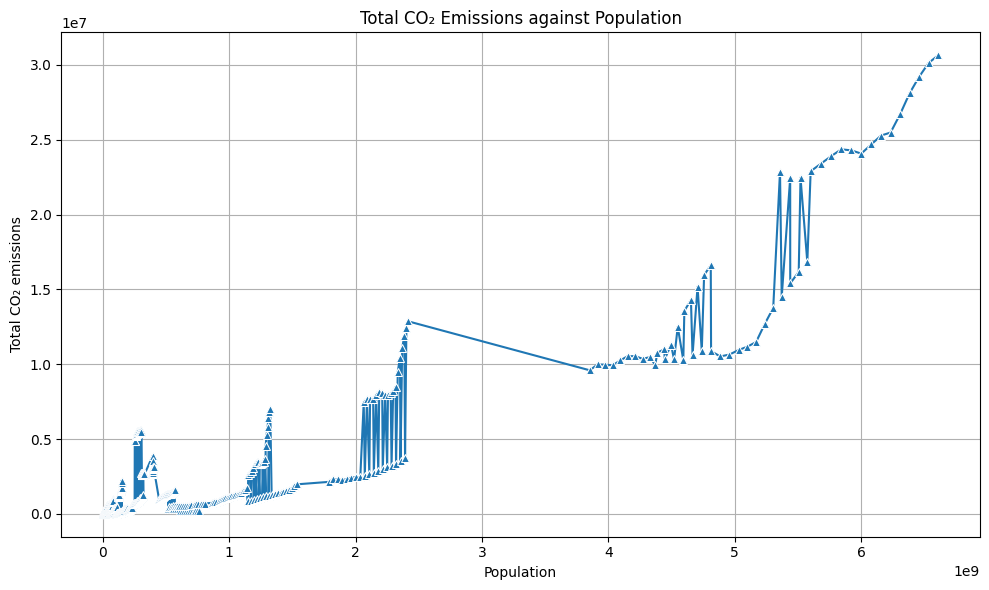

In [13]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

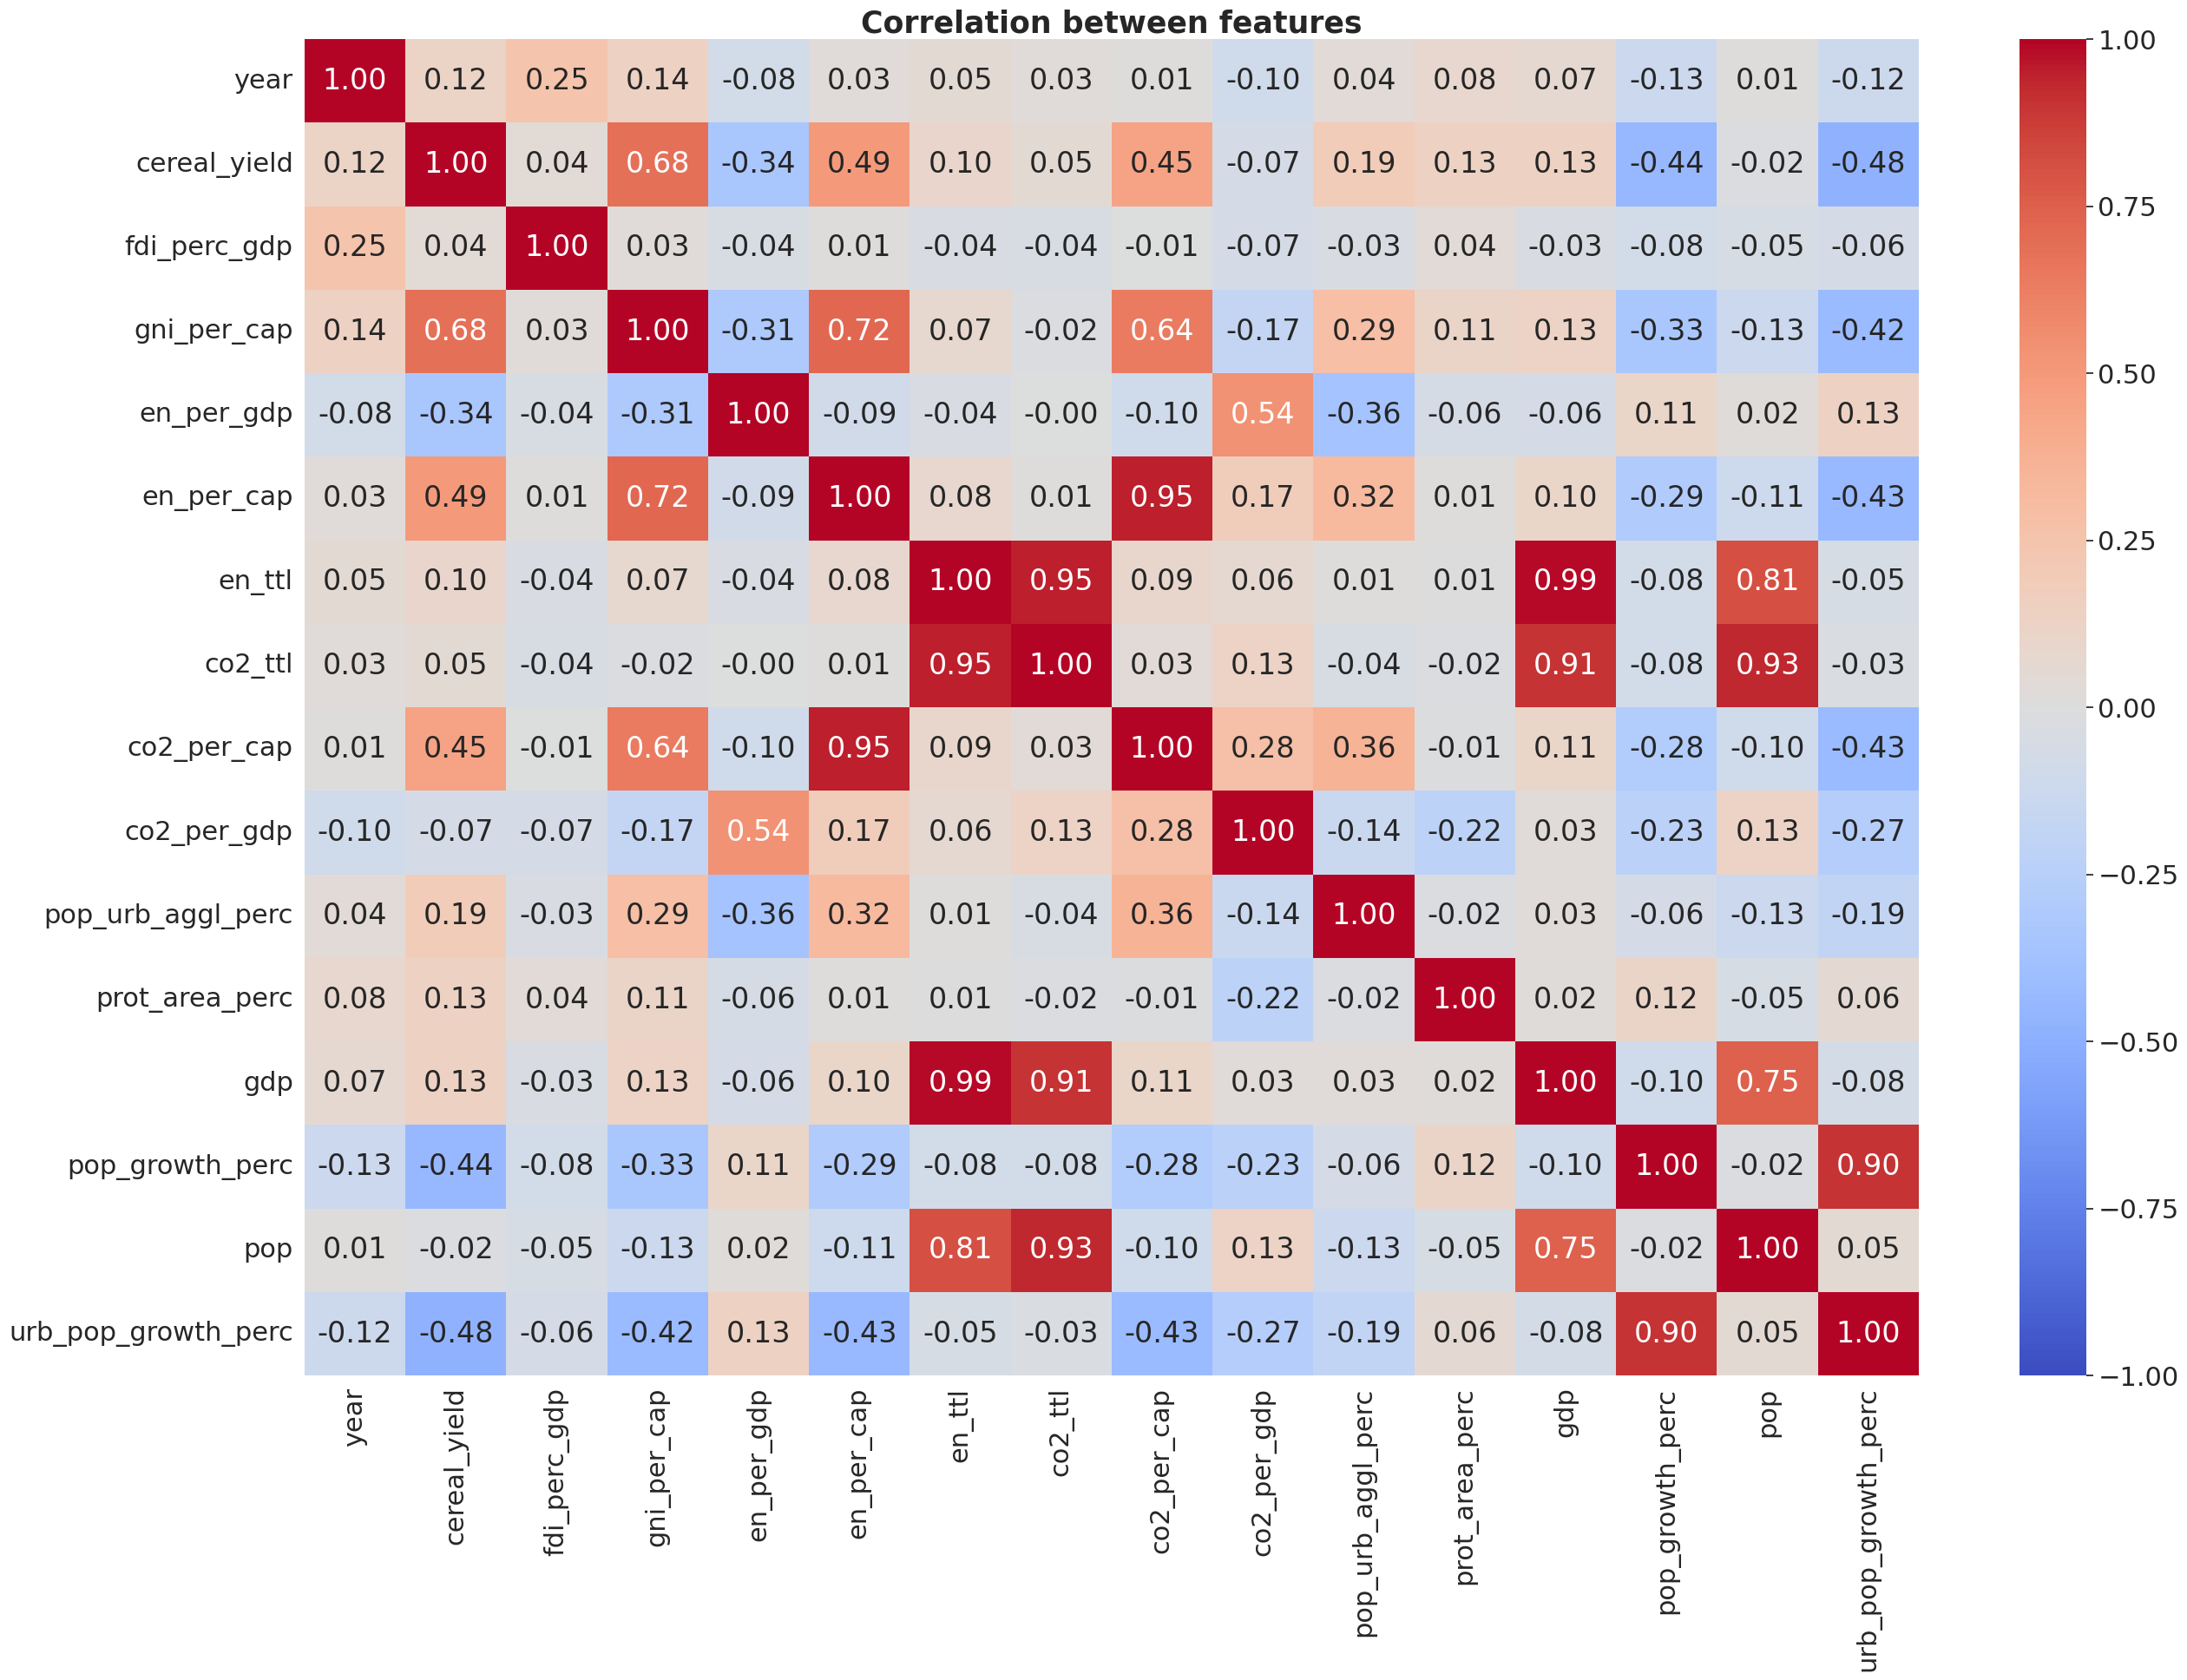

In [16]:
# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f",
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)

In [17]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

               feature        VIF
0         cereal_yield   1.528133
1         fdi_perc_gdp   0.971334
2          gni_per_cap   2.910812
3           en_per_cap  12.579371
4          co2_per_cap  10.762323
5    pop_urb_aggl_perc   0.979676
6       prot_area_perc   1.022400
7                  gdp   1.106440
8      pop_growth_perc   6.336530
9  urb_pop_growth_perc   5.808288


In [18]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


In [19]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [20]:
# get unique values in country column

unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BGD', 'BGR', 'BLR',
       'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECA', 'ECU',
       'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR', 'GHA', 'GRC',
       'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KOR', 'LAC', 'LIC', 'LMC', 'LMY',
       'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB', 'VEN',
       'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

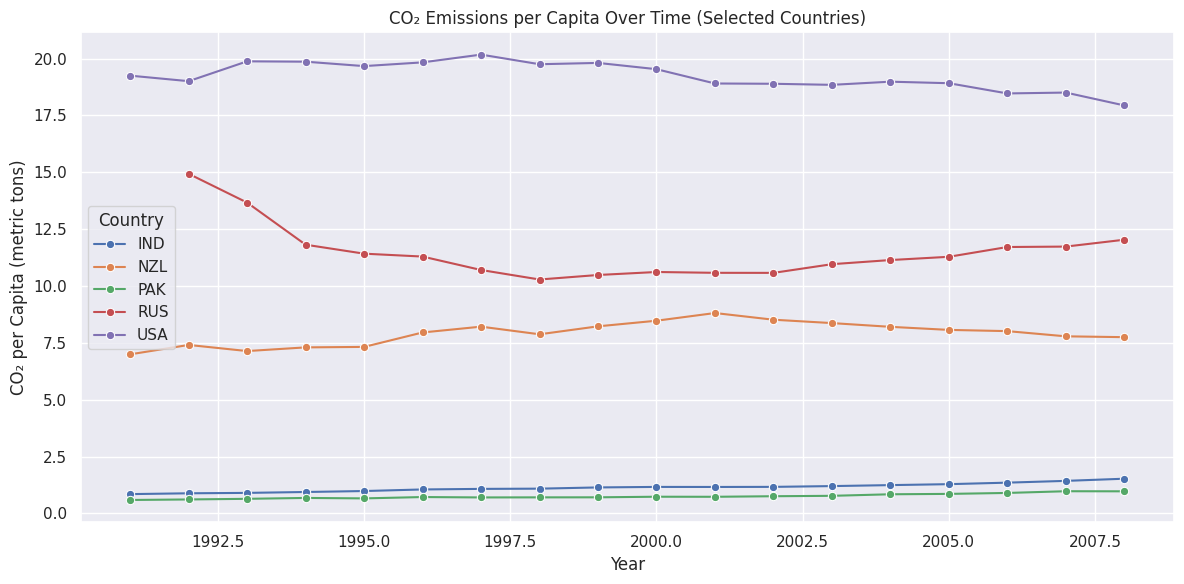

In [21]:
# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Use the correct DataFrame variable 'data' and column names 'country', 'year', and 'co2_per_cap'
df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
# Use the correct DataFrame variable 'df_selected' and column names 'year' and 'co2_per_cap' for plotting
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

In [23]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

Text(115.34385937499995, 0.5, 'CO2 emissions per capita [t]')

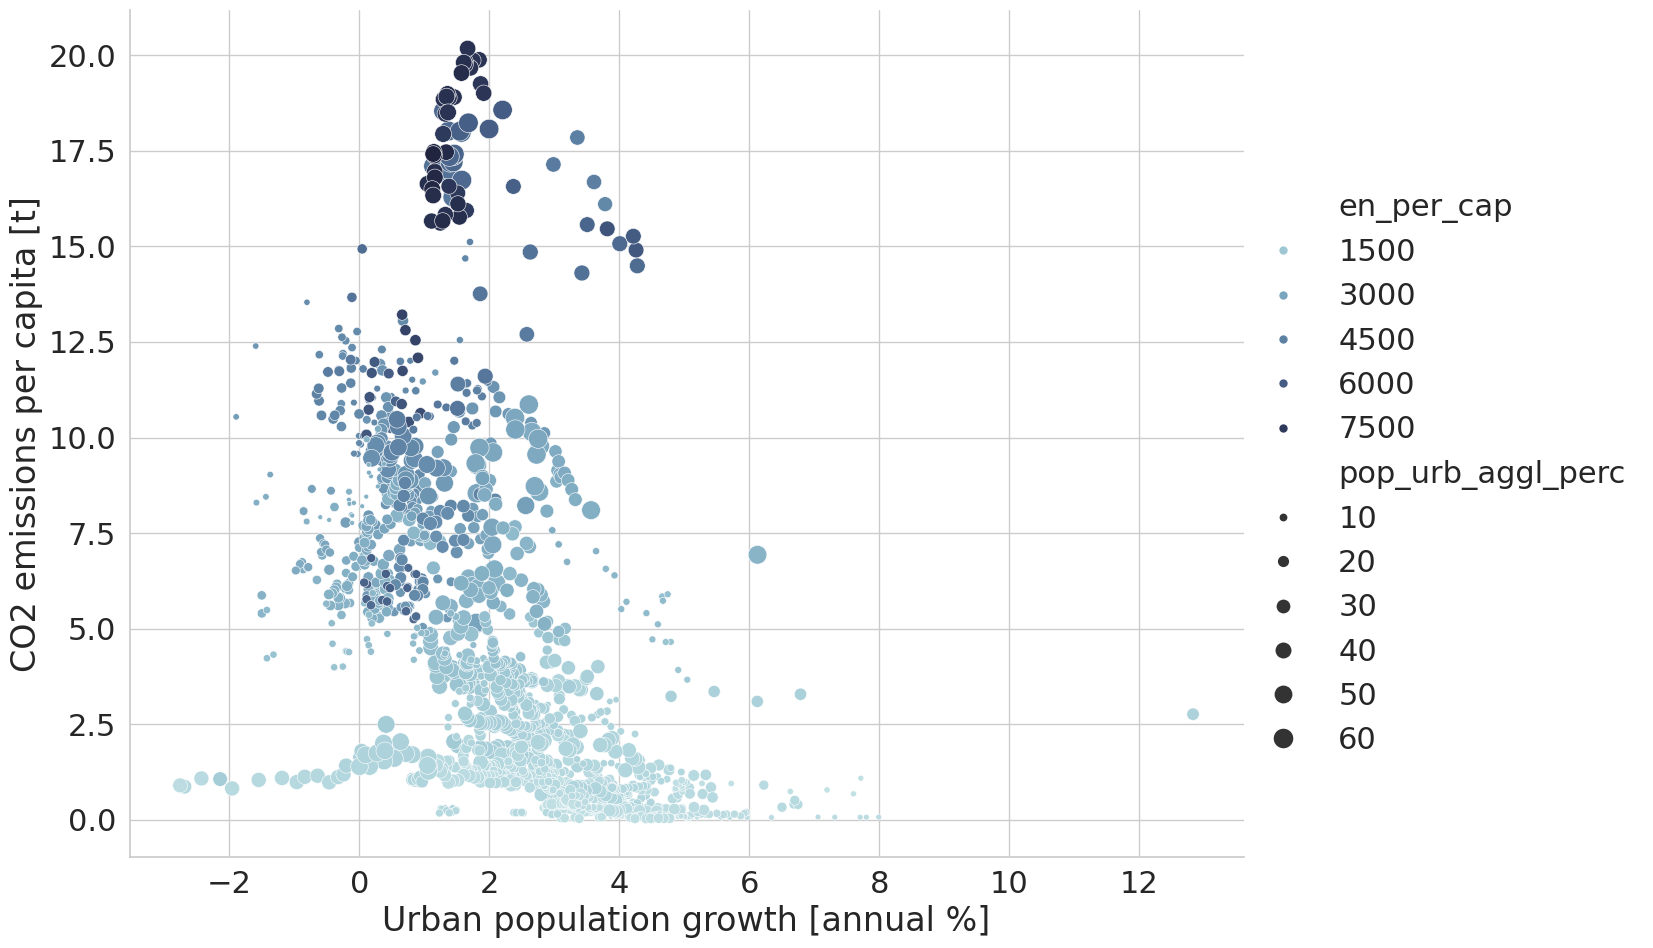

In [25]:
# 4d plot

sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])